# Introduction to Quantum error correction

<table width="100%"><tr><td style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;text-align:right;">LaTeX Macros. </td></tr></table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $

## Classical error correction vs quantum error correction

### Classical error correction

Classical information technologies employ binary encodings in which data is represented as sequences of bits **‘0’** or **‘1’**. The basic principle behind error correction is that the
number of bits used to encode a given amount of information is increased. The exact way in which this redundant encoding is achieved is specified as error correction code.
The simplest example of an **error correction code** is the **three-bit repetition code**, the encoder for which duplicates each bit value 0 → 000 and 1 → 111.




**<h3> Three bit repetition code </h3>**

We have two parties: Asja and Balvis. They are going to commnicate with one another through a classical communication channel, where Asja sends 0's and 1's using a binary coding. Assume that this channel is noisy in such a way that **0 can be flipped to 1 and vice versa**, randomly. 

In this case, we will take some assumptions for simplification: 
- We consider only the errors causing bit flips. 
- We assume that the communication channel is binary symmetric, meaning that if **p is the probability that an error causes 1→0**, **0→1** can occur with the same probability p. **The probability of no error is then 1-p**.
Note that real classical hardware may not respect this simplification.

Asja wants to minimise the error communication by using repetition code. For this, Asja needs to encode each bit of information into an odd number of bits, let's take in our case **three transmission bits**, so 0 → 000 and 1 → 111.

We can imagine many scenarios: One outcome is that none of the bits suffers an error; another possibility is that one bit suffers an error; or two suffer errors, or all three do.

#### Task1
We want to write the probabilities for each of these outcomes, assuming the errors are all independent, then calculate them for p=0.01. (On paper)

<mark>Remember that p is the probability for one bit flip error to occur.<mark>

#### Solution

If the probability for one bit to suffer an error is p, then the probability that no bit suffers no error is $(1−p)^3$. The probability that all three bits have errors is $p^3$
; and the probability for one bit or two bits to have errors is $3(1 − p)^2p$ and $ 3(1 − p)p^2$,
respectively (the factor of 3 because there are three places the error or non-error can occur
among the three bits).

| Error syndrom     | Probability ($p=0.01$)     |
| :-----------:     | :------------------------------:  |
| no error          |$ (1-p)^3≈0.97$                |
| one error         | $ 3(1 − p)^2p ≈ 0.029$            |
| two errors        |$3(1 − p)p^2 ≈ 0.0003$             |
| three errors      | $p^3 = 10^{−6} $                  |



Consider that Asja communicates a single-bit message ‘0’ to Balvis. Using the three physical bit encoding, the message that she would send would be the ‘000’ codeword.

In this case, for Balvis to decrypte the message, he will use what we call **majority rule**, meaning that he will vote the bits he received against one another, So our error correction protocol would be to continuously compare all three bits, if they don’t all match, flip the
one which would bring them back to matching.

A communication error only occurs when there are two- or three-bit errors, so the probability of a communication error goes from p when sending a single bit, to $3(1 − p)p^2 + p^3$ when sending three bits. 

This probability is less than p, if $p < 1/2$; if p is very small, then this error is of order  $3p^2 << p$. If for example the error probability p is one percent (0.01), then the probabilities of the various errors are show in the solutions of Task1. The rate of communication errors falls from one percent to roughly 0.03 percent by using this simple code, a reduction by a factor of 30 at the cost of having to send three times as many bits.


For added protection one can use more redundant physical bits, such as five physical bits to encode one bit of information. Such larger code could withstand two bit-flip errors at a time and correction via majority rule would still be successful.

#### Task2 (Optional)
Find the communication error rate using a majority voting scheme for a 5-bit encoding, given a one-bit error rate p. (On paper)

### Quantum error correction

Quantum states and operations can also be protected from errors through the use of protocols for quantum computing with faulty components. These protocols are known as **quantum error correction codes QEC**. We start first by covering a simple protocole to correct quantum errors then we move to more sofisticated error correction codes. 

**<h3>Bit-flip qubit encoding</h3>**

We have seen before how three-bit repetition code can be implemented in a classical communication channel. 

Now, we assume that Asja wants to communicate a quantum state $\ket{u}=a\ket{1}+b\ket{0}$. 

Let’s assume that we can have only bit-flip errors, so we have the error
processes $\ket{0}$ → $\ket{1}$ and $\ket{1}$ → $\ket{0}$ with a **probablity $p$**. This corresponds to applying an $\hat{X}$ gate randomly. If the unwanted $\hat{X}$ gate does not
act, Balvis will receive the state $\ket{u}$ , with probability $1 − p$. 

One can think of applying the repetition code to protect the quantum state from errors. Asja needs then to create the state $\ket{u}\ket{u}\ket{u} = \ket{uuu}$, not knowing a and b,
Asja would have to duplicate the state and thus violate the **no-cloning theorem**. 



**No-cloning theorem:**

This theorem claims that for a given qubit in an arbitrary unknown state $\ket{\psi_{1}}$ and
another qubit in a known initial state $\ket{\psi_{2}}$, there does not exist any
unitary operator $U$ (i.e., any quantum mechanical evolution) such that $$U(\ket{\psi_{1}}\ket{\psi_{2}})=\ket{\psi_{1}}\ket{\psi_{1}} $$ 

meaning that there is no quantum operation able to copy a state $\ket{\psi_{1}}$ into the auxiliary qubit $\ket{\psi_{2}}$.

**Proof:**

Suppose such a unitary operator as specified in the theoem. This means we can properly copy two orthogonal states $\ket{0}$ and $\ket{1}$, meaning: 

$$ U(\ket{0}\ket{\psi_{1}})=\ket{0}\ket{0} $$ 
$$ U(\ket{1}\ket{\psi_{1}})=\ket{1}\ket{1} $$ 

Quantum mechanical operators must be linear so we can try applying this operator to the linear superposition $a\ket{0} + b\ket{1}$ and we must get
$$U( (a\ket{0} + b\ket{1})\ket{\psi_{1}} ) =a\ket{0}\ket{0} + b\ket{1}\ket{1}$$
But this is not what a putative cloning device must give. Instead a clone of the bit should have given the outcome: 
$$U( (a\ket{0} + b\ket{1})\ket{\psi_{1} }) =(a\ket{0} + b\ket{1})(a\ket{0} + b\ket{1})$$
which is not generally the same result. Thus no-cloning principle is proved.

Hopefully, although cloning a quantum state is not possible, there is another method to create a 'redundent' state. Asja can use a three bit encoding by sending ,instead, a **Greenberger-Horne-Zeilinger GHZ state** , as follows: 

$$a\ket{0} + b\ket{1} ⇒ a\ket{000} + b\ket{111}$$


Now let's see how to generate this GHZ state. 

This can be done by implementing the following circuit: 
- Asja starts first with $\ket{u}$, in addition to two other qubits each in the state $\ket{0}$.
- Asja then does a CNOT using the first qubit as the control and the second qubit as the target, yielding the two-qubit state $a\ket{00} + b\ket{11}$ as the output. 
- She then does a second controlled-NOT with the third qubit, generating the desired three-qubit GHZ state $\ket{q_0q_1q_2}=a\ket{000} + b\ket{111}$. 

#### Task3

We define a quantum circuit with three qubits: $\ket{u}= a\ket{0} + b\ket{1}$ and two other qubits $ q_0 $ and $ q_1 $ initialised to $\ket{0}$. Implement the circuit following the previous operations to obtain a GHZ state. For simplification, we assume $a=b=\frac{1}{\sqrt{2}}$


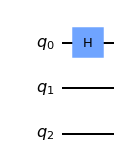

In [1]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(3)
qc.h(0) 
#ENTER CODE HERE 
qc.draw(output='mpl',reverse_bits=False)

#### Solution

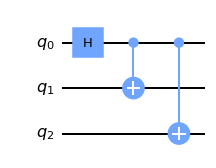

In [3]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(3)
# Apply hadamard operator
qc.h(0)
#Apply CNOT operators
qc.cx(0,1)
qc.cx(0,2)
qc.draw(output='mpl',reverse_bits=False)

**Parity check measurement**

Now, Balvis receives the encoded qubit from Asja. He wants to check if there were any errors in transmission. To do this, Balvis needs to use two additional qubits $q3$ and $q4$, known as ancilla qubits, to “vote” the communication qubits against one another, using the following circuit:

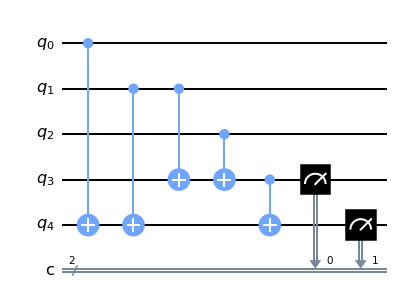

In [4]:
from qiskit import QuantumCircuit


qc = QuantumCircuit(5,2)
qc.cx(0,4)
qc.cx(1,4)
qc.cx(1,3)
qc.cx(2,3)
qc.cx(3,4)
qc.measure(3,0)
qc.measure(4,1)

#ENTER CODE HERE 
qc.draw(output='mpl',reverse_bits=False)

Then we measure the ancilla qubits. This method is called: **parity check measurement**. 

In fact, the way this circuit works is that the first and second qubits ($q_0$, $q_1$) control sequential CNOTs on the first ancilla $q_4$, which effectively makes these two qubits “vote” against one another; if they are not in the same state, the result is that the first ancilla is flipped. Then the second and third qubits  ($q_1$, $q_2$) do the same to the second ancilla $q_3$, flipping that ancilla if these two qubits differ.

Finally, the two ancillas are compared, thus effectively comparing one and two against two
and three, which is the same as one voting against three. The result is that the two ancillas
report not only an error, but indicate in binary form where the error occurred; note the circuit only works if at most one qubit suffered an error.




Let’s work through the parity check circuit, following its operation step by step. We assume that a single $X$ error has occurred to the second qubit during transmission, so the state Balvis receives is $a\ket{010} + b\ket{101}$ instead of the error-free $a\ket{010} + b\ket{101}$. 

The states following each of the gates in the circuit are then:
 $$\ket{\psi_{1}}=(a\ket{010} + b\ket{101})\ket{00}$$
 $$\ket{\psi_{2}}=a\ket{010}\ket{00} + b\ket{101}\ket{10}$$
 $$\ket{\psi_{3}}=a\ket{010}\ket{10} + b\ket{101}\ket{10}$$
 $$\ket{\psi_{4}}=a\ket{010}\ket{11} + b\ket{101}\ket{10}$$
 $$\ket{\psi_{5}}=a\ket{010}\ket{11} + b\ket{101}\ket{11}$$
 $$\ket{\psi_{6}}=a\ket{010}\ket{10} + b\ket{101}\ket{10}=(a\ket{010} + b\ket{101})\ket{10}$$

At the end of the process, the ancilla qubits encode the binary number $10$, which indicates
an error on the second qubit; the measurement of the two ancillas at the end of this process
would identify this error to Balvis, and he could then apply a corrective $X$ gate to the second qubit, recovering the state Asja had sent.


<h3> Task4</h3>
We assume in this task that a single $X$ error has occurred to the third qubit during transmission. Write the states following each of the gates in the circuit, and conclude how Balvis can check the error in the received quantum state.

The following table summarizes the outcomes, where $q_0$
through $q_2$ are the communicated qubits and $q_3$ and $q_4$
are the ancillas; an X in the column for qj means that that qubit suffered an $X$ error. You can see that, as mentioned above, $q_3q_4$ is a binary-encoded indicator of where the error occurred.

| q0 q1 q2     | q3 q4      |
| :-----------:     | :------: |
| 0 0 0          |0 0    |
| X 0 0         | 0 1    |
| 0 X 0       |1 0    |
| 0 0 X      | 1 1  |





- If two or three qubits suffer errors, the circuit does not work, so we didn’t tabulate those errors.

- The ancillas $q_3$ and $q_4 are called an error syndrome, indicating what error occurred.

**<h3>Nine qubit Shor Code</h3>**

In the previous code, we managed to detect only bit filp errors ($X$-errors). It turns out that (of course) there is a way to protect against both bit-flip and phase-flip errors;
this was another of Peter Shor’s major discoveries. His code, which was the first example of a
fully-protected error code, uses nine qubits in what is called a **concatenated code**.

$$a\ket{0} + b\ket{1} ⇒ a\frac{1}{2\sqrt{2}}(\ket{000} + \ket{111}) (\ket{000} + \ket{111}) (\ket{000} + \ket{111})$$
$$+ b\frac{1}{2\sqrt{2}}(\ket{000} - \ket{111}) (\ket{000} - \ket{111}) (\ket{000} - \ket{111}) .$$

The encoding is done using the following circuit: 

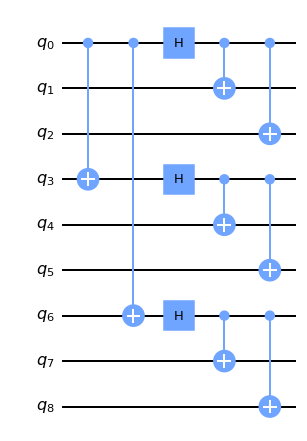

In [5]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(9)
qc.cx(0,3)
qc.cx(0,6)
qc.h(0)
qc.h(3)
qc.h(6)
qc.cx(0,1)
qc.cx(0,2)
qc.cx(3,4)
qc.cx(3,5)
qc.cx(6,7)
qc.cx(6,8)

#ENTER CODE HERE 
qc.draw(output='mpl',reverse_bits=False)

The way the Shor code works is that each set of three initial qubits q0, q3 and q6 in the previous circuit are first
encoded in the bit-flip code $a\ket{000} + b\ket{111}$ that we already looked at. Each qubit in this code is then the basis for a three-qubit block, where a qubit in $\ket{0}$ is encoded as $\ket{+++}$ and a
qubit in $\ket{1}$ becomes $\ket{---}$. This allows detection and correction of both bit- and phase-flips.

**References**

- An introduction to the surface code by Andrew N. Cleland, University of Chicago, Chicago IL 60637, USA
- Quantum Error Correction: An Introductory Guide by Joschka Roffe, Department of Physics & Astronomy, University of Sheffield, Sheffield, S3 7RH, United Kingdom
- Topological Quantum: Lecture Notes and Proto-Book by Steven H. Simon
